# Image Classifier V0.1

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess the CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5327 - accuracy: 0.4409 - val_loss: 1.2446 - val_accuracy: 0.5517
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1986 - accuracy: 0.5741 - val_loss: 1.1332 - val_accuracy: 0.5986
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0400 - accuracy: 0.6327 - val_loss: 1.0264 - val_accuracy: 0.6400
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9359 - accuracy: 0.6721 - val_loss: 0.9628 - val_accuracy: 0.6579
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8592 - accuracy: 0.6984 - val_loss: 0.9159 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7981 - accuracy: 0.7190 - val_loss: 0.9362 - val_accuracy: 0.6772
Epoch 7/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7546 - accuracy: 0.7365 - val_loss: 0.8690 -

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 6s 18ms/step - loss: 0.8977 - accuracy: 0.7029
Test accuracy: 0.7028999924659729


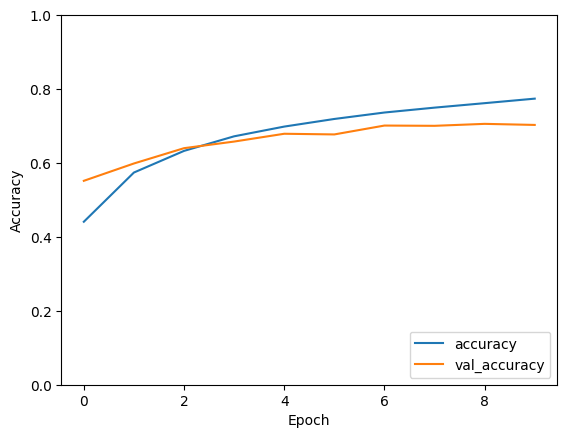

In [7]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Test model with new image

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


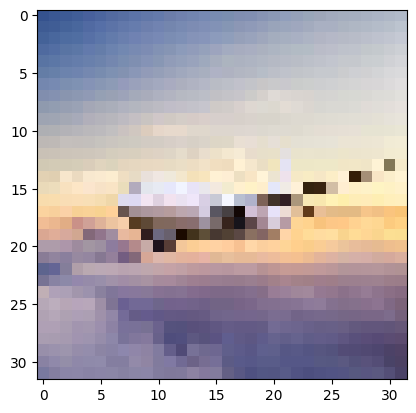

In [30]:
# Load the new image from Google drive
img_path = '/content/drive/MyDrive/Projects/image_classifier/plane.jpeg'
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize pixel values

# Visualize the image
plt.imshow(img)
plt.show()


## Make predictions

In [31]:
# Make predictions with softmax activation
predictions = model.predict(img_array)
probabilities = tf.nn.softmax(predictions[0]).numpy()

1/1 [==============================] - 0s 39ms/step


In [32]:
# Get the predicted class and confidence
class_index = np.argmax(probabilities)
confidence = probabilities[class_index]

## Interpret predictions

In [33]:
# Interpret the predictions
cifar_10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = cifar_10_classes[class_index]

print(f'The model predicts that the image belongs to the class: {predicted_class}')
print(f'Confidence: {confidence:.2f}')

The model predicts that the image belongs to the class: airplane
Confidence: 0.80
